In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_labeled= pd.read_csv('/content/drive/My Drive/Master_Thesis/new_labeled_dataset.csv')
df_labeled


,generated_summary,labels
0,i understand that when someone immediately off...,2
1,i'm here to welcome you to the r/depression ch...,1
2,i stay up all night when i'm depressed to dela...,2
3,"i have procrastinated a lot in my life, avoidi...",2
4,i find that sleep is my ultimate escape and so...,1
...,...,...
7726,i see snow.,0
7727,i watched moulin rouge and it made me cry once...,0
7728,"i am attempting to call out, but i am unable t...",0
7729,"i can't find my red sox hat, so i have to wear...",0


In [ ]:
import joblib

import joblib
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()

    # Convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return lemmas

def preprocessing(text):
    lower_text = text.lower()
    punctuation_free = "".join([chars for chars in lower_text if chars not in string.punctuation])
    remove_urls = re.sub(r'http\S+', '', punctuation_free)
    remove_digits = re.sub(r'\d', '', remove_urls)
    tokenized_text = word_tokenize(remove_digits)

    # Remove stop words
    filtered_tokens = [token for token in tokenized_text if token not in stop_words]

    # Lemmatize tokens
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)

    return lemmatized_tokens

best_tfidf_vectorizer = joblib.load('/content/drive/My Drive/Master_Thesis/best_tfidf_vectorizer.pkl')

In [ ]:
X_train=joblib.load('/content/drive/My Drive/Master_Thesis/X_train.pkl')
y_train=joblib.load('/content/drive/My Drive/Master_Thesis/y_train.pkl')
X_test=joblib.load('/content/drive/My Drive/Master_Thesis/X_test.pkl')
y_test=joblib.load('/content/drive/My Drive/Master_Thesis/y_test.pkl')

In [ ]:


import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import RandomizedSearchCV

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_tfidf = best_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = best_tfidf_vectorizer.transform(X_test)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make', 'u'] not in stop_words.
  warnings.warn(


X_train_tfidf shape: (6184, 9056), y_train shape: 6184
Sample weights length: 6184
Best F1 Score: 0.816109 using {'learning_rate': 0.16000000000000003}
Learning Rate: 0.01, Mean F1 Score: 0.758496 (Std: 0.010002), Mean Log Loss: 0.913042 (Std: 0.009497)
Learning Rate: 0.06, Mean F1 Score: 0.800896 (Std: 0.006070), Mean Log Loss: 0.579407 (Std: 0.008565)
Learning Rate: 0.11, Mean F1 Score: 0.810325 (Std: 0.004816), Mean Log Loss: 0.520630 (Std: 0.007180)
Learning Rate: 0.16, Mean F1 Score: 0.816109 (Std: 0.005155), Mean Log Loss: 0.497181 (Std: 0.005885)
Learning Rate: 0.21, Mean F1 Score: 0.815289 (Std: 0.006700), Mean Log Loss: 0.486685 (Std: 0.007198)
Learning Rate: 0.26, Mean F1 Score: 0.814910 (Std: 0.007000), Mean Log Loss: 0.480632 (Std: 0.006718)
Learning Rate: 0.31, Mean F1 Score: 0.812156 (Std: 0.003442), Mean Log Loss: 0.478793 (Std: 0.007601)
Learning Rate: 0.36, Mean F1 Score: 0.813994 (Std: 0.006282), Mean Log Loss: 0.476441 (Std: 0.006546)
Learning Rate: 0.41, Mean F1 Sco

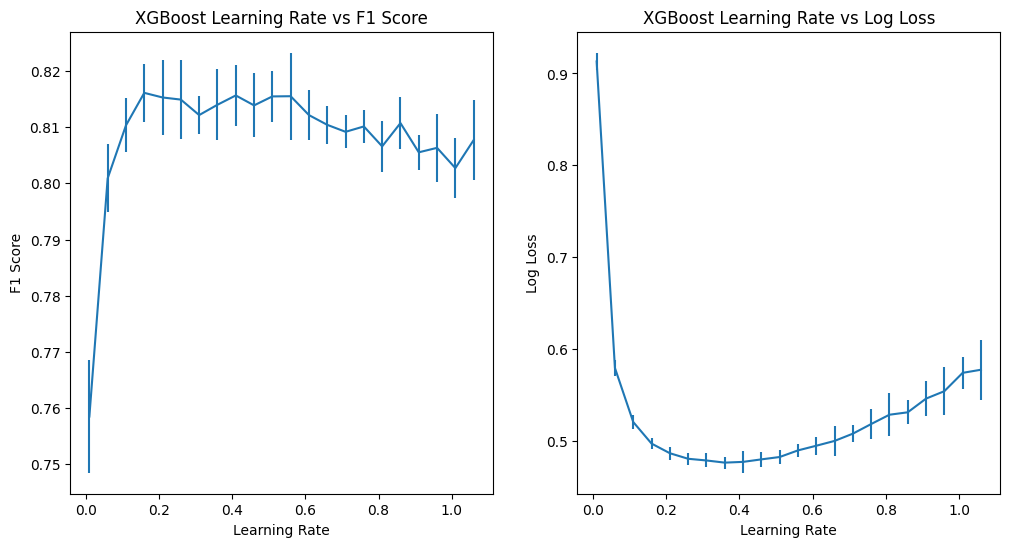

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, log_loss, f1_score
from matplotlib import pyplot as plt


print(f"X_train_tfidf shape: {X_train_tfidf.shape}, y_train shape: {len(y_train)}")

# Compute sample weights for imbalanced classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Sample weights length: {len(sample_weights)}")

learning_rates = np.arange(0.01, 1.1, 0.05)
param_grid = dict(learning_rate=learning_rates)

xgb_classifier = XGBClassifier(objective='multi:softprob', n_estimators=120, max_depth=5)

log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

xgb_grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring={'f1_weighted': 'f1_weighted', 'neg_log_loss': log_loss_scorer},
    refit='f1_weighted',
    return_train_score=True
)

xgb_grid_search.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

print("Best F1 Score: %f using %s" % (xgb_grid_search.best_score_, xgb_grid_search.best_params_))

results = xgb_grid_search.cv_results_
means_f1 = results['mean_test_f1_weighted']
stds_f1 = results['std_test_f1_weighted']
means_log_loss = -results['mean_test_neg_log_loss']
stds_log_loss = results['std_test_neg_log_loss']
params = results['params']

best_log_loss = float('inf')
best_log_loss_params = None

data = []
for mean_f1, std_f1, mean_log_loss, std_log_loss, param in zip(means_f1, stds_f1, means_log_loss, stds_log_loss, params):
    data.append({
        'learning_rate': param['learning_rate'],
        'mean_f1': mean_f1,
        'std_f1': std_f1,
        'mean_log_loss': mean_log_loss,
        'std_log_loss': std_log_loss
    })
    print("Learning Rate: %.2f, Mean F1 Score: %f (Std: %f), Mean Log Loss: %f (Std: %f)" %
          (param['learning_rate'], mean_f1, std_f1, mean_log_loss, std_log_loss))

    # Check if the current log loss is better than the best log loss so far
    if mean_log_loss < best_log_loss:
        best_log_loss = mean_log_loss
        best_log_loss_params = param

print("Best Log Loss: %f using %s" % (best_log_loss, best_log_loss_params))

df = pd.DataFrame(data)
df.to_csv('xgboost_results_learning_rate.csv', index=False)  # <--- This is the part that stores the results in a CSV file

# Plot the results for F1 score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(learning_rates, means_f1, yerr=stds_f1)
plt.title("XGBoost Learning Rate vs F1 Score")
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')

# Plot the results for Log Loss
plt.subplot(1, 2, 2)
plt.errorbar(learning_rates, means_log_loss, yerr=stds_log_loss)
plt.title("XGBoost Learning Rate vs Log Loss")
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')

plt.savefig('learning_rate.png')
plt.show()

X_train_tfidf shape: (6184, 9056), y_train shape: 6184
Sample weights length: 6184
Best F1 Score: 0.809146 using {'learning_rate': 0.09999999999999999}
Learning Rate: 0.01, Mean F1 Score: 0.758496 (Std: 0.010002), Mean Log Loss: 0.913042 (Std: 0.009497)
Learning Rate: 0.02, Mean F1 Score: 0.772201 (Std: 0.007254), Mean Log Loss: 0.758310 (Std: 0.011182)
Learning Rate: 0.03, Mean F1 Score: 0.782448 (Std: 0.010148), Mean Log Loss: 0.681247 (Std: 0.010693)
Learning Rate: 0.04, Mean F1 Score: 0.790946 (Std: 0.009118), Mean Log Loss: 0.634408 (Std: 0.009495)
Learning Rate: 0.05, Mean F1 Score: 0.798682 (Std: 0.007813), Mean Log Loss: 0.603323 (Std: 0.009141)
Learning Rate: 0.06, Mean F1 Score: 0.800896 (Std: 0.006070), Mean Log Loss: 0.579407 (Std: 0.008565)
Learning Rate: 0.07, Mean F1 Score: 0.802838 (Std: 0.003260), Mean Log Loss: 0.561842 (Std: 0.008202)
Learning Rate: 0.08, Mean F1 Score: 0.804073 (Std: 0.002750), Mean Log Loss: 0.548740 (Std: 0.008046)
Learning Rate: 0.09, Mean F1 Sco

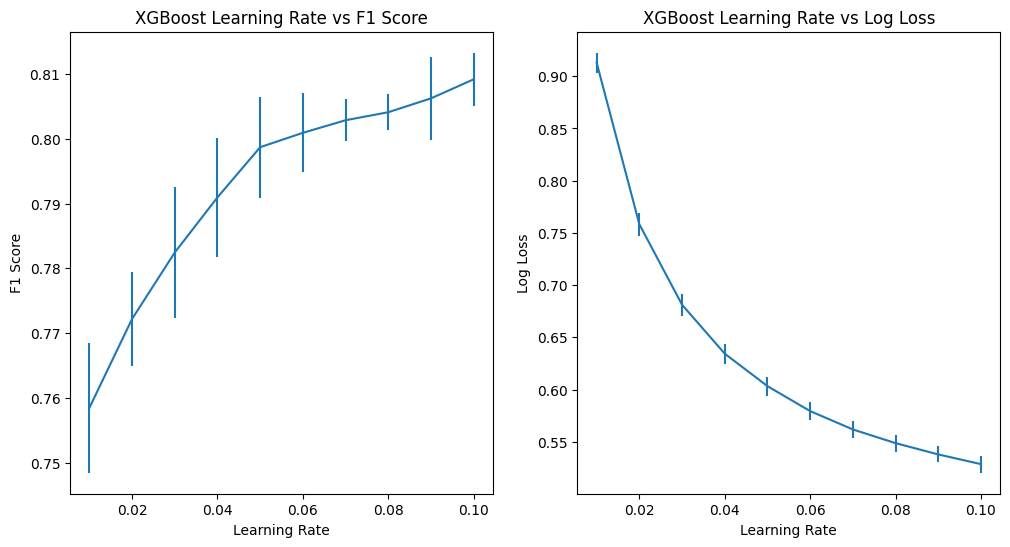

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, log_loss, f1_score
from matplotlib import pyplot as plt


print(f"X_train_tfidf shape: {X_train_tfidf.shape}, y_train shape: {len(y_train)}")

# Compute sample weights for imbalanced classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Sample weights length: {len(sample_weights)}")

learning_rates = np.arange(0.01, 0.11, 0.01)
param_grid = dict(learning_rate=learning_rates)

xgb_classifier = XGBClassifier(objective='multi:softprob', n_estimators=120, max_depth=5)

log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

xgb_grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring={'f1_weighted': 'f1_weighted', 'neg_log_loss': log_loss_scorer},
    refit='f1_weighted',
    return_train_score=True
)

xgb_grid_search.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

print("Best F1 Score: %f using %s" % (xgb_grid_search.best_score_, xgb_grid_search.best_params_))

# Extract the results
results = xgb_grid_search.cv_results_
means_f1 = results['mean_test_f1_weighted']
stds_f1 = results['std_test_f1_weighted']
means_log_loss = -results['mean_test_neg_log_loss']
stds_log_loss = results['std_test_neg_log_loss']
params = results['params']

best_log_loss = float('inf')
best_log_loss_params = None

data = []
for mean_f1, std_f1, mean_log_loss, std_log_loss, param in zip(means_f1, stds_f1, means_log_loss, stds_log_loss, params):
    data.append({
        'learning_rate': param['learning_rate'],
        'mean_f1': mean_f1,
        'std_f1': std_f1,
        'mean_log_loss': mean_log_loss,
        'std_log_loss': std_log_loss
    })
    print("Learning Rate: %.2f, Mean F1 Score: %f (Std: %f), Mean Log Loss: %f (Std: %f)" %
          (param['learning_rate'], mean_f1, std_f1, mean_log_loss, std_log_loss))

    # Check if the current log loss is better than the best log loss so far
    if mean_log_loss < best_log_loss:
        best_log_loss = mean_log_loss
        best_log_loss_params = param

print("Best Log Loss: %f using %s" % (best_log_loss, best_log_loss_params))

df = pd.DataFrame(data)
df.to_csv('xgboost_results_learning_rate.csv', index=False)  # <--- This is the part that stores the results in a CSV file

# Plot the results for F1 score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(learning_rates, means_f1, yerr=stds_f1)
plt.title("XGBoost Learning Rate vs F1 Score")
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')

# Plot the results for Log Loss
plt.subplot(1, 2, 2)
plt.errorbar(learning_rates, means_log_loss, yerr=stds_log_loss)
plt.title("XGBoost Learning Rate vs Log Loss")
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')

plt.savefig('learning_rate.png')
plt.show()

X_train_tfidf shape: (6184, 9056), y_train shape: 6184
Sample weights length: 6184
Best F1 Score: 0.816546 using {'learning_rate': 0.22999999999999995}
Learning Rate: 0.10, Mean F1 Score: 0.809146 (Std: 0.004100), Mean Log Loss: 0.528626 (Std: 0.008223)
Learning Rate: 0.11, Mean F1 Score: 0.810325 (Std: 0.004816), Mean Log Loss: 0.520630 (Std: 0.007180)
Learning Rate: 0.12, Mean F1 Score: 0.808601 (Std: 0.005583), Mean Log Loss: 0.515412 (Std: 0.006287)
Learning Rate: 0.13, Mean F1 Score: 0.810744 (Std: 0.006522), Mean Log Loss: 0.510235 (Std: 0.008051)
Learning Rate: 0.14, Mean F1 Score: 0.813572 (Std: 0.004848), Mean Log Loss: 0.504429 (Std: 0.007248)
Learning Rate: 0.15, Mean F1 Score: 0.815479 (Std: 0.003900), Mean Log Loss: 0.498907 (Std: 0.005928)
Learning Rate: 0.16, Mean F1 Score: 0.816109 (Std: 0.005155), Mean Log Loss: 0.497181 (Std: 0.005885)
Learning Rate: 0.17, Mean F1 Score: 0.810318 (Std: 0.006174), Mean Log Loss: 0.495059 (Std: 0.006930)
Learning Rate: 0.18, Mean F1 Sco

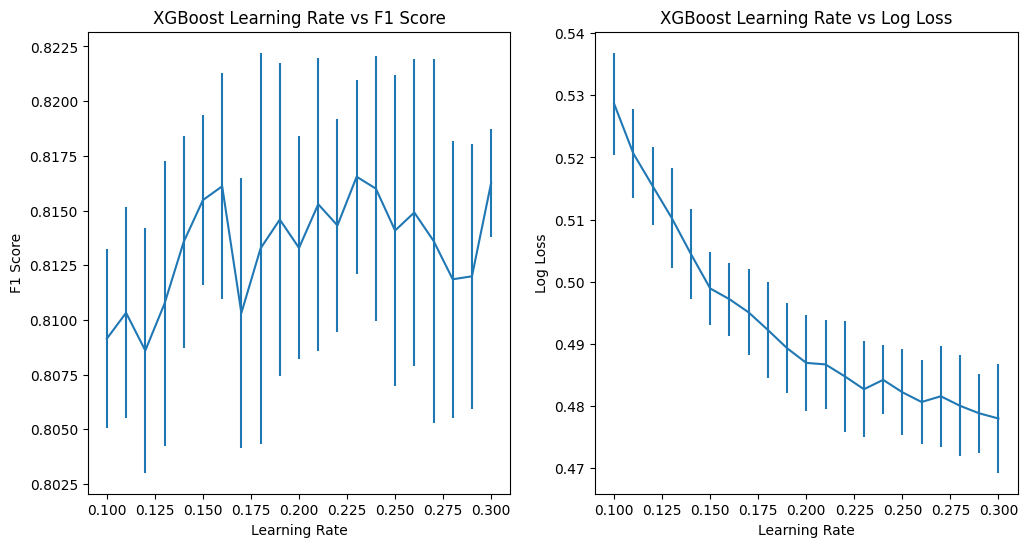

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, log_loss, f1_score
from matplotlib import pyplot as plt


print(f"X_train_tfidf shape: {X_train_tfidf.shape}, y_train shape: {len(y_train)}")

# Compute sample weights for imbalanced classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Sample weights length: {len(sample_weights)}")

learning_rates = np.arange(0.1, 0.31, 0.01)
param_grid = dict(learning_rate=learning_rates)

xgb_classifier = XGBClassifier(objective='multi:softprob', n_estimators=120, max_depth=5)

log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

xgb_grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring={'f1_weighted': 'f1_weighted', 'neg_log_loss': log_loss_scorer},
    refit='f1_weighted',
    return_train_score=True
)

xgb_grid_search.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

print("Best F1 Score: %f using %s" % (xgb_grid_search.best_score_, xgb_grid_search.best_params_))

# Extract the results
results = xgb_grid_search.cv_results_
means_f1 = results['mean_test_f1_weighted']
stds_f1 = results['std_test_f1_weighted']
means_log_loss = -results['mean_test_neg_log_loss']
stds_log_loss = results['std_test_neg_log_loss']
params = results['params']

best_log_loss = float('inf')
best_log_loss_params = None

data = []
for mean_f1, std_f1, mean_log_loss, std_log_loss, param in zip(means_f1, stds_f1, means_log_loss, stds_log_loss, params):
    data.append({
        'learning_rate': param['learning_rate'],
        'mean_f1': mean_f1,
        'std_f1': std_f1,
        'mean_log_loss': mean_log_loss,
        'std_log_loss': std_log_loss
    })
    print("Learning Rate: %.2f, Mean F1 Score: %f (Std: %f), Mean Log Loss: %f (Std: %f)" %
          (param['learning_rate'], mean_f1, std_f1, mean_log_loss, std_log_loss))

    # Check if the current log loss is better than the best log loss so far
    if mean_log_loss < best_log_loss:
        best_log_loss = mean_log_loss
        best_log_loss_params = param

# Print the best log loss and its corresponding parameters
print("Best Log Loss: %f using %s" % (best_log_loss, best_log_loss_params))

df = pd.DataFrame(data)
df.to_csv('xgboost_results_learning_rate.csv', index=False)  # <--- This is the part that stores the results in a CSV file

# Plot the results for F1 score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(learning_rates, means_f1, yerr=stds_f1)
plt.title("XGBoost Learning Rate vs F1 Score")
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')

# Plot the results for Log Loss
plt.subplot(1, 2, 2)
plt.errorbar(learning_rates, means_log_loss, yerr=stds_log_loss)
plt.title("XGBoost Learning Rate vs Log Loss")
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')

# Save the figure
plt.savefig('learning_rate.png')
plt.show()

X_train_tfidf shape: (6184, 9056), y_train shape: 6184
Sample weights length: 6184
Best F1 Score: 0.809146 using {'learning_rate': 0.1}
Learning Rate: 0.01, Mean F1 Score: 0.758496 (Std: 0.010002), Mean Log Loss: 0.913042 (Std: 0.009497)
Learning Rate: 0.01, Mean F1 Score: 0.768212 (Std: 0.007699), Mean Log Loss: 0.819279 (Std: 0.010964)
Learning Rate: 0.03, Mean F1 Score: 0.776727 (Std: 0.008416), Mean Log Loss: 0.714524 (Std: 0.010587)
Learning Rate: 0.05, Mean F1 Score: 0.798682 (Std: 0.007813), Mean Log Loss: 0.603323 (Std: 0.009141)
Learning Rate: 0.10, Mean F1 Score: 0.809146 (Std: 0.004100), Mean Log Loss: 0.528626 (Std: 0.008223)
Best Log Loss: 0.528626 using {'learning_rate': 0.1}


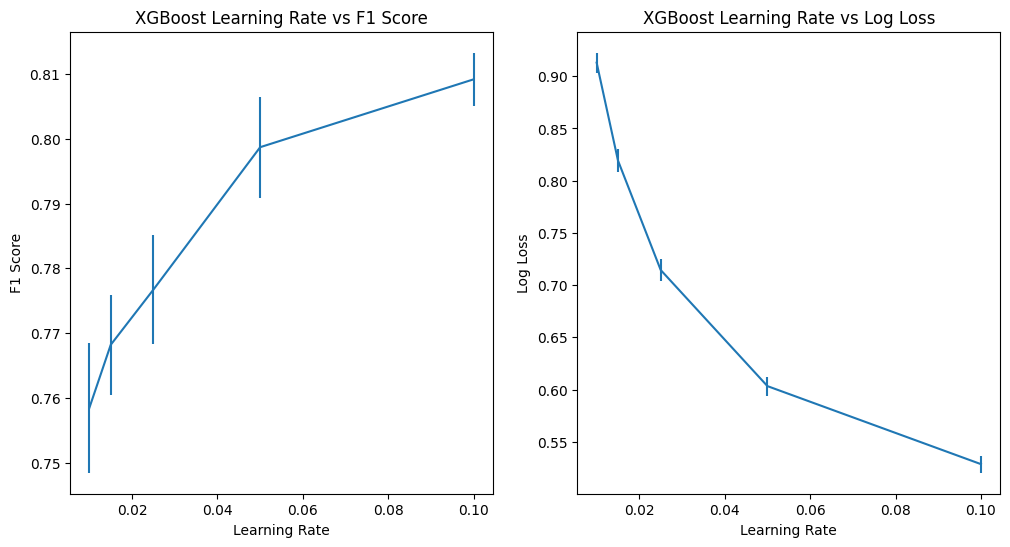

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, log_loss, f1_score
from matplotlib import pyplot as plt

print(f"X_train_tfidf shape: {X_train_tfidf.shape}, y_train shape: {len(y_train)}")

# Compute sample weights for imbalanced classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Sample weights length: {len(sample_weights)}")

learning_rates = [0.01, 0.015, 0.025, 0.05, 0.1]
param_grid = dict(learning_rate=learning_rates)

xgb_classifier = XGBClassifier(objective='multi:softprob', n_estimators=120, max_depth=5)

log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

xgb_grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring={'f1_weighted': 'f1_weighted', 'neg_log_loss': log_loss_scorer},
    refit='f1_weighted',
    return_train_score=True
)

xgb_grid_search.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

print("Best F1 Score: %f using %s" % (xgb_grid_search.best_score_, xgb_grid_search.best_params_))

results = xgb_grid_search.cv_results_
means_f1 = results['mean_test_f1_weighted']
stds_f1 = results['std_test_f1_weighted']
means_log_loss = -results['mean_test_neg_log_loss']
stds_log_loss = results['std_test_neg_log_loss']
params = results['params']

best_log_loss = float('inf')
best_log_loss_params = None

data = []
for mean_f1, std_f1, mean_log_loss, std_log_loss, param in zip(means_f1, stds_f1, means_log_loss, stds_log_loss, params):
    data.append({
        'learning_rate': param['learning_rate'],
        'mean_f1': mean_f1,
        'std_f1': std_f1,
        'mean_log_loss': mean_log_loss,
        'std_log_loss': std_log_loss
    })
    print("Learning Rate: %.2f, Mean F1 Score: %f (Std: %f), Mean Log Loss: %f (Std: %f)" %
          (param['learning_rate'], mean_f1, std_f1, mean_log_loss, std_log_loss))

    # Check if the current log loss is better than the best log loss so far
    if mean_log_loss < best_log_loss:
        best_log_loss = mean_log_loss
        best_log_loss_params = param

print("Best Log Loss: %f using %s" % (best_log_loss, best_log_loss_params))

df = pd.DataFrame(data)
df.to_csv('xgboost_results_learning_rate.csv', index=False)  # <--- This is the part that stores the results in a CSV file

# Plot the results for F1 score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(learning_rates, means_f1, yerr=stds_f1)
plt.title("XGBoost Learning Rate vs F1 Score")
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')

# Plot the results for Log Loss
plt.subplot(1, 2, 2)
plt.errorbar(learning_rates, means_log_loss, yerr=stds_log_loss)
plt.title("XGBoost Learning Rate vs Log Loss")
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')

plt.savefig('learning_rate.png')
plt.show()

X_train_tfidf shape: (6184, 9056), y_train shape: 6184
Sample weights length: 6184
Best F1 Score: 0.819486 using {'learning_rate': 0.23}
Learning Rate: 0.01, Mean F1 Score: 0.761756 (Std: 0.009836), Mean Log Loss: 0.839461 (Std: 0.010637)
Learning Rate: 0.02, Mean F1 Score: 0.775991 (Std: 0.007505), Mean Log Loss: 0.706835 (Std: 0.009965)
Learning Rate: 0.03, Mean F1 Score: 0.790674 (Std: 0.004036), Mean Log Loss: 0.641364 (Std: 0.009226)
Learning Rate: 0.04, Mean F1 Score: 0.796694 (Std: 0.004745), Mean Log Loss: 0.600544 (Std: 0.009032)
Learning Rate: 0.05, Mean F1 Score: 0.803513 (Std: 0.005730), Mean Log Loss: 0.573059 (Std: 0.008520)
Learning Rate: 0.06, Mean F1 Score: 0.808581 (Std: 0.003670), Mean Log Loss: 0.553262 (Std: 0.007627)
Learning Rate: 0.07, Mean F1 Score: 0.810165 (Std: 0.004041), Mean Log Loss: 0.538599 (Std: 0.008115)
Learning Rate: 0.08, Mean F1 Score: 0.811840 (Std: 0.002791), Mean Log Loss: 0.526853 (Std: 0.007482)
Learning Rate: 0.09, Mean F1 Score: 0.813323 (S

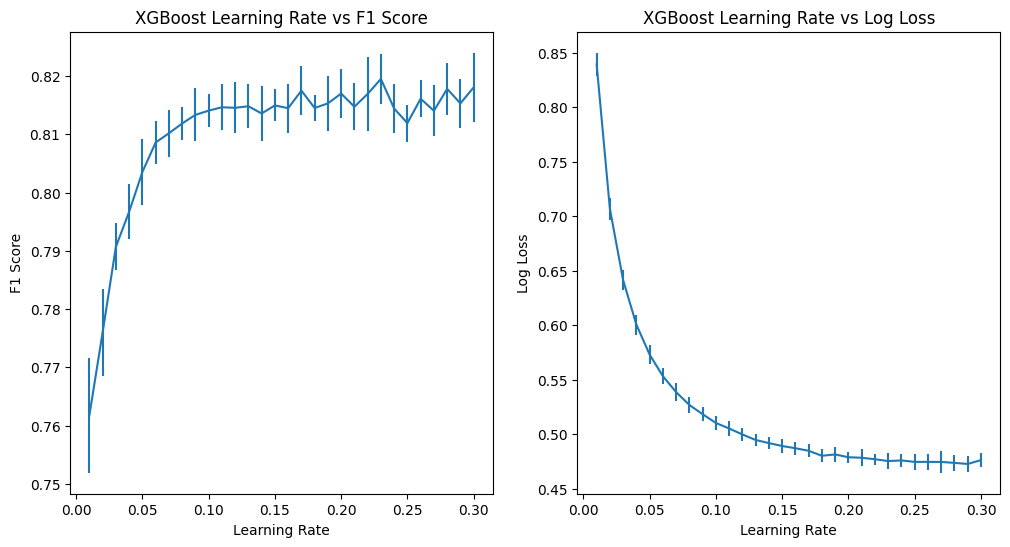

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, log_loss, f1_score
from matplotlib import pyplot as plt

print(f"X_train_tfidf shape: {X_train_tfidf.shape}, y_train shape: {len(y_train)}")

# Compute sample weights for imbalanced classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Sample weights length: {len(sample_weights)}")

learning_rates = np.arange(0.01, 0.31, 0.01)
param_grid = dict(learning_rate=learning_rates)

xgb_classifier = XGBClassifier(objective='multi:softprob', n_estimators=195, max_depth=4)

log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

xgb_grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring={'f1_weighted': 'f1_weighted', 'neg_log_loss': log_loss_scorer},
    refit='f1_weighted',
    return_train_score=True
)

xgb_grid_search.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

print("Best F1 Score: %f using %s" % (xgb_grid_search.best_score_, xgb_grid_search.best_params_))

# Extract the results
results = xgb_grid_search.cv_results_
means_f1 = results['mean_test_f1_weighted']
stds_f1 = results['std_test_f1_weighted']
means_log_loss = -results['mean_test_neg_log_loss']
stds_log_loss = results['std_test_neg_log_loss']
params = results['params']

best_log_loss = float('inf')
best_log_loss_params = None

data = []
for mean_f1, std_f1, mean_log_loss, std_log_loss, param in zip(means_f1, stds_f1, means_log_loss, stds_log_loss, params):
    data.append({
        'learning_rate': param['learning_rate'],
        'mean_f1': mean_f1,
        'std_f1': std_f1,
        'mean_log_loss': mean_log_loss,
        'std_log_loss': std_log_loss
    })
    print("Learning Rate: %.2f, Mean F1 Score: %f (Std: %f), Mean Log Loss: %f (Std: %f)" %
          (param['learning_rate'], mean_f1, std_f1, mean_log_loss, std_log_loss))

    # Check if the current log loss is better than the best log loss so far
    if mean_log_loss < best_log_loss:
        best_log_loss = mean_log_loss
        best_log_loss_params = param

print("Best Log Loss: %f using %s" % (best_log_loss, best_log_loss_params))

df = pd.DataFrame(data)
df.to_csv('xgboost_results_learning_rate_0.01_0.31_estimator_195_depth_4.csv', index=False)  # <--- This is the part that stores the results in a CSV file

# Plot the results for F1 score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(learning_rates, means_f1, yerr=stds_f1)
plt.title("XGBoost Learning Rate vs F1 Score")
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')

# Plot the results for Log Loss
plt.subplot(1, 2, 2)
plt.errorbar(learning_rates, means_log_loss, yerr=stds_log_loss)
plt.title("XGBoost Learning Rate vs Log Loss")
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')

plt.savefig('learning_rate_0.01_0.31_estimator_195_depth_4.png')
plt.show()